In [58]:
import requests
import json
import matplotlib.pyplot as plt

import pandas as pd

auth_data = {
    "grant_type"    : "client_credentials",
    "client_id"     : "93c09f2e3a6e4150b50334f2ead49ab2",
    "client_secret" : "796002fd7ad95eaafac28c0669afd0274df67a60ad5cc09db4dd813c0c88c56a",
    "scope"         : "read_product_data"
}

# create session instance
session = requests.Session()

auth_request = session.post("https://idfs.gs.com/as/token.oauth2", data = auth_data)
access_token_dict = json.loads(auth_request.text)
access_token = "0012NkJpYOmEGZmibnTl8qH6ubI4"

# update session headers with access token
session.headers.update({"Authorization":"Bearer "+ access_token})

request_url = "https://api.marquee.gs.com/v1/data/USCANFPP_MINI/query"

request_query = {
                    "startDate": "2012-01-01",
                    "limit": 300
               }

request = session.post(url=request_url, json=request_query)
results = json.loads(request.text)




In [59]:
results = json.loads(request.text)
results = pd.DataFrame(results)
results["date"] = results["data"]
results["gsid"] = results["data"]
results["financialReturnsScore"] = results["data"]
results["growthScore"] = results["data"]
results["multipleScore"] = results["data"]
results["integratedScore"] = results["data"]
results["updateTime"] = results["data"]
counter = 0
for result in results["data"]:
    results["date"][counter] = result.get('date')
    results["gsid"][counter] = result.get('gsid')
    results["financialReturnsScore"][counter] = result.get('financialReturnsScore')
    results["growthScore"][counter] = result.get('growthScore')
    results["multipleScore"][counter] = result.get('multipleScore')
    results["integratedScore"][counter] = result.get('integratedScore')
    results["updateTime"][counter] = result.get('updateTime')
    counter += 1

results = results.drop('data', 1)
results

    

,requestId,date,gsid,financialReturnsScore,growthScore,multipleScore,integratedScore,updateTime
0,eb3648d5-2745,2012-07-02,75154,0.178,0.656,0.402,0.478,2017-05-11T19:47:36Z
1,eb3648d5-2745,2012-07-03,75154,0.178,0.658,0.4,0.478,2017-05-11T19:47:36Z
2,eb3648d5-2745,2012-07-04,75154,0.176,0.658,0.392,0.48,2017-05-11T19:47:36Z
3,eb3648d5-2745,2012-07-05,75154,0.178,0.66,0.396,0.48,2017-05-11T19:47:36Z
4,eb3648d5-2745,2012-07-06,75154,0.176,0.66,0.394,0.48,2017-05-11T19:47:36Z
...,...,...,...,...,...,...,...,...
29995,eb3648d5-2745,2014-09-29,905632,0.976,0.564,0.9,0.546,2017-05-11T19:47:36Z
29996,eb3648d5-2745,2014-09-30,905632,0.976,0.562,0.9,0.546,2017-05-11T19:47:36Z
29997,eb3648d5-2745,2014-10-01,905632,0.976,0.562,0.9,0.546,2017-05-11T19:47:36Z
29998,eb3648d5-2745,2014-10-02,905632,0.976,0.562,0.9,0.546,2017-05-11T19:47:36Z


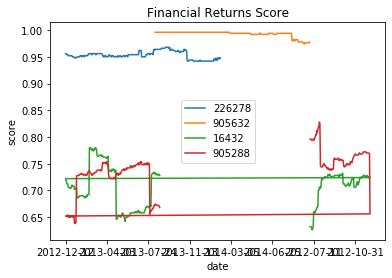

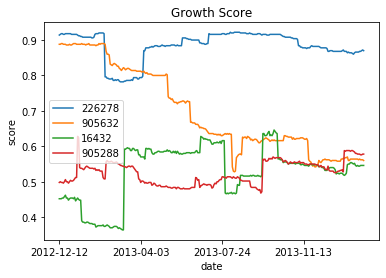

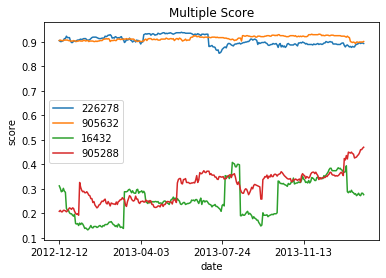

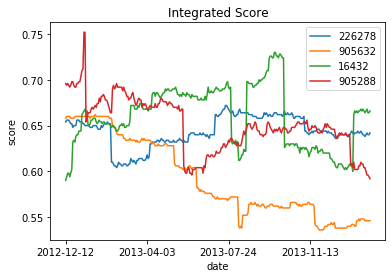

In [78]:
import matplotlib
import matplotlib.ticker as plticker
def temp(gsid):
    fig, ax = plt.subplots(1,1)
    datetemp = results[results["gsid"] == gsid[0]]
    i = 0
    for val in gsid:
        temp = results[results["gsid"] == val]
        datetemp = results[results["gsid"] == gsid[i]]
        ax.plot(datetemp["date"], temp["financialReturnsScore"])
        i +=1
            
    
        
    loc = plticker.MultipleLocator(base=80.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
    ax.legend(gsid)
    ax.set_ylabel("score")
    ax.set_xlabel("date")
    ax.set_title("Financial Returns Score")
        
        
        
    fig, ax = plt.subplots(1,1)
    datetemp = results[results["gsid"] == gsid[0]]
    for val in gsid: 
        temp = results[results["gsid"] == val]
        ax.plot(datetemp["date"], temp["growthScore"])
        
    loc = plticker.MultipleLocator(base=80.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
    ax.legend(gsid)
    ax.set_ylabel("score")
    ax.set_xlabel("date")
    ax.set_title("Growth Score")

    fig, ax = plt.subplots(1,1)
    datetemp = results[results["gsid"] == gsid[0]]
    for val in gsid: 
        temp = results[results["gsid"] == val]
        ax.plot(datetemp["date"], temp["multipleScore"])
        
    loc = plticker.MultipleLocator(base=80.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
    ax.legend(gsid)
    ax.set_ylabel("score")
    ax.set_xlabel("date")
    ax.set_title("Multiple Score")   
    

    fig, ax = plt.subplots(1,1)
    datetemp = results[results["gsid"] == gsid[0]]
    for val in gsid: 
        temp = results[results["gsid"] == val]
        ax.plot(datetemp["date"], temp["integratedScore"])
        
    loc = plticker.MultipleLocator(base=80.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
    ax.legend(gsid)
    ax.set_ylabel("score")
    ax.set_xlabel("date")
    ax.set_title("Integrated Score")   
        

   
temp(['226278', '905632', '16432','905288'])

In [ ]:
print(results["financialReturnsScore"].max())

In [ ]:
#given an input of an array of gsid and a period of time.. start and end points , produce visual image for each of the features 


#Recommendation for which stock is the best based off of certain weight factors - default equal weights 
#given an input of weights [out of 1] for each of the score,
 #a. rank the stocks 
 #b. data visualization on the percent change    


#move to streamlit 


In [ ]:
result = pd.DataFrame(results)


#print(results)
def graphs50(ids):
    frs = pd.DataFrame()
    gs = pd.DataFrame()
    ms = pd.DataFrame()
    ints = pd.DataFrame()

#     for val in ids:
#         subset = results.loc[results['gsid'] == val]
#         print(subset['financialReturnsScore'].reset_index(drop=True))
#         frs.append(subset['financialReturnsScore'].reset_index(drop = True))
#         gs[val] = subset['growthScore'].reset_index(drop = True)
#         ms[val] = subset['multipleScore'].reset_index(drop = True)
#         ints[val] = subset['integratedScore'].reset_index(drop = True)
    

#     plt.figure()
#     def tempfunc(val):
#         return int(val)
    
    print("helllo")

    print(type(results["gsid"][0]))
    print(results.loc[results["gsid"] == ids[0]])
    results.loc[results["gsid"] == ids[0]].plot()
    
    
      #results.plot()
#     frs.plot()
#     plt.figure()
#     gs.plot()
#     plt.figure()
#     ms.plot()
#     plt.figure()
#     ints.plot()
    
    
graphs50(['226278', '905632', '13936', '29209'])


In [ ]:
def four_plots(ids, start_date, end_date):
    p = results['date'].unique()
    frs = pd.DataFrame()
    frs['date'] = p
    gs = pd.DataFrame()
    gs['date'] = p
    ms = pd.DataFrame()
    ms['date'] = p
    ints = pd.DataFrame()
    ints['date'] = p
    
    for val in ids:
        subset = results.loc[results['gsid'] == val]

        frs_n = subset[['date', 'financialReturnsScore']].rename(columns = {'financialReturnsScore':val}).reset_index(drop = True)
        gs_n = subset2[['date', 'growthScore']].rename(columns = {'growthScore':val}).reset_index(drop = True)
        ms_n = subset2[['date', 'multipleScore']].rename(columns = {'multipleScore':val}).reset_index(drop = True)
        ints_n = subset2[['date', 'integratedScore']].rename(columns = {'integratedScore':val}).reset_index(drop = True)
        
        frs = pd.merge(frs, frs_n, on='date')
        gs = pd.merge(gs, gs_n, on='date')
        ms = pd.merge(ms, ms_n, on='date')
        ints = pd.merge(ints, ints_n, on='date')
        
    i1 = frs[frs["date"] == start_date]
    i2 = frs[frs["date"] == end_date]
    r = range(i1, i2 + 1)
    frs = frs.iloc[r]
    gs = gs.iloc[r]
    ms = ms.iloc[r]
    ints = ints.iloc[r]
    
    plt.figure()
    frs.plot()
    plt.figure()
    gs.plot()
    plt.figure()
    ms.plot()
    plt.figure()
    ints.plot()
    
fourplots(['226278', '905632'], '2012-07-12', '2014-08-12')


In [ ]:
import matplotlib.pyplot as plt

def temp(gsid):
    grpd = results.groupby('gsid')
    for name, data in grpd:
        if (name in gsid):
            plt.plot(data.date.values, data.financialReturnsScore.values, 'x-', label = name)
         
    plt.legend()
    
temp(['226278', '905632'])

Input Company's ID: 53613,905632
Enter date in the format y-m-d 2013-10-09
input financial return weight starting from range 0-100 30
input growth weight starting from range 0-100 20


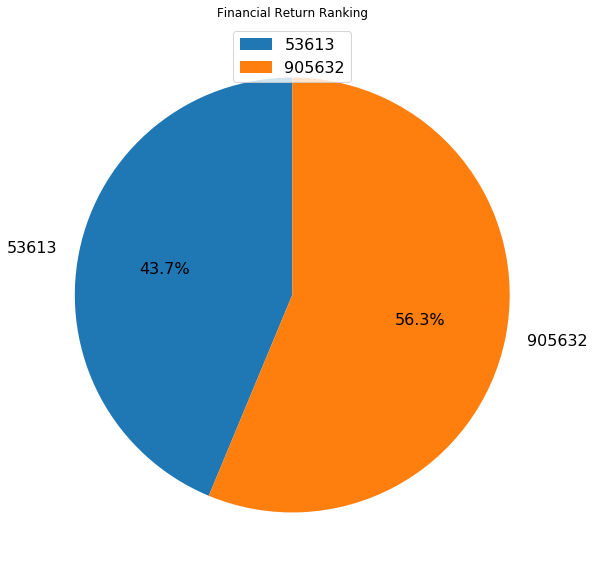

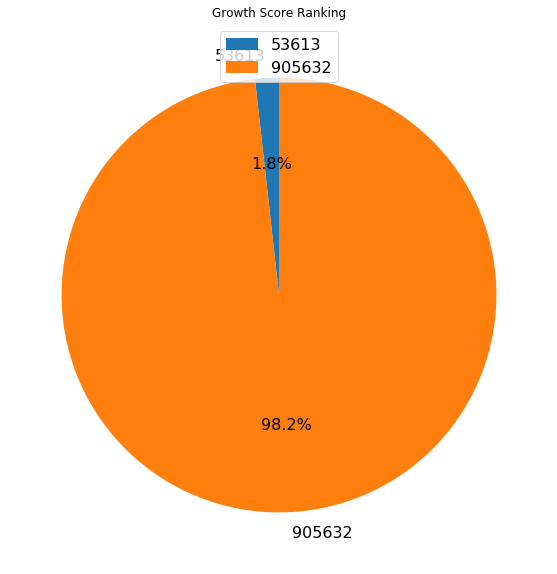

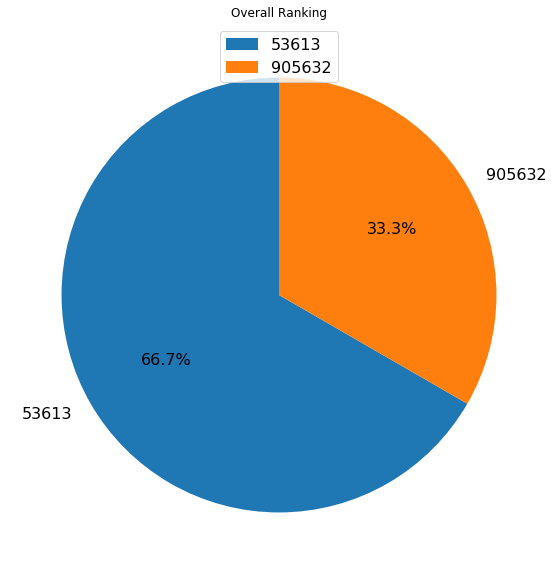

In [33]:
from datetime import datetime
import matplotlib.pyplot as plt


def unix_stamp(date):
    return  datetime.strptime(date,"%Y-%m-%d")

def financialReturnandGrowthScore():
  #Allow users to input list of company id and the date 
  inputCompanyID  = list(input("Input Company's ID: ").split(","))
  date = unix_stamp(input('Enter date in the format y-m-d ' ))

  #Weight values
  financialReturnWeight = int(input("input financial return weight starting from range 0-100 "))
  growthWeight  = int(input("input growth weight starting from range 0-100 "))

  companyID = results['gsid']
  
  companies = []
  for i in range(len(companyID)):
    if companyID[i] in inputCompanyID and date == unix_stamp(results['date'][i]):
      #CompanyDic[companyID[i]] = [results['financialReturnsScore'][i]*financialReturnWeight,results['growthScore'][i]*growthWeight]
      companyID[i] = {
          "name": companyID[i],
          "Date": date,
          "WeightedFinancialReturn": results['financialReturnsScore'][i]*financialReturnWeight,
          "WeightedGrowthScore": results['growthScore'][i]*growthWeight
      }
      companies.append(companyID[i])
  data = pd.DataFrame(companies)
  return data

def percentageChange():
  data = financialReturnandGrowthScore()
  data['FinancialReturn%Change'] = (data['WeightedFinancialReturn'] / data['WeightedFinancialReturn'].sum()) * 100
  data['GrowthScore%Change'] = (data['WeightedGrowthScore'] / data['WeightedGrowthScore'].sum()) * 100
  data['Ranks'] = (data['WeightedGrowthScore'] + data['WeightedFinancialReturn']).rank(ascending = 0) 
  data.head(10)
  return data

def visualize():
  data = percentageChange()
  #Financial Return plot
  _, ax = plt.subplots(figsize = (10,10))
  wedges,_,_ = ax.pie(data['FinancialReturn%Change']
                      ,labels=data["name"]
                      ,shadow=False,startangle=90, autopct="%1.1f%%"
                      ,textprops={'fontsize': 16})
  ax.legend(wedges,data["name"], loc="upper center", prop={'size': 16});
  ax.set_title("Financial Return Ranking")

  #Growth score plot
  _, ax = plt.subplots(figsize = (10,10))
  wedges,_,_ = ax.pie(data['GrowthScore%Change']
                      ,labels=data["name"]
                      ,shadow=False,startangle=90, autopct="%1.1f%%"
                      ,textprops={'fontsize': 16})
  ax.legend(wedges,data["name"], loc="upper center", prop={'size': 16});
  ax.set_title("Growth Score Ranking")

  # Overall ranking
  _, ax = plt.subplots(figsize = (10,10))
  wedges,_,_ = ax.pie(data['Ranks']
                      ,labels=data["name"]
                      ,shadow=False,startangle=90, autopct="%1.1f%%"
                      ,textprops={'fontsize': 16})
  ax.legend(wedges,data["name"], loc="upper center", prop={'size': 16});
  ax.set_title("Overall Ranking")


  
finalResult = visualize()